# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ridwan Donovan]
- **Email:** [donostdy@gmail.com]
- **ID Dicoding:** [ridwandonovan]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Korelasi antara kondisi cuaca dengan jumlah persewaan?
- Bagaimana perbandingan jumlah persewaan antara hari libur dan hari kerja?
- Bagaimana perkembangan persewaan sepeda dari tahun 2011 sampai 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
link = "https://raw.githubusercontent.com/donostdy/Bike-Sharing-Data-Analysis/main/day.csv"

In [3]:
df = pd.read_csv(link)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Dari pengecekan data diatas, tidaka ada data duplikat, maupun null

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

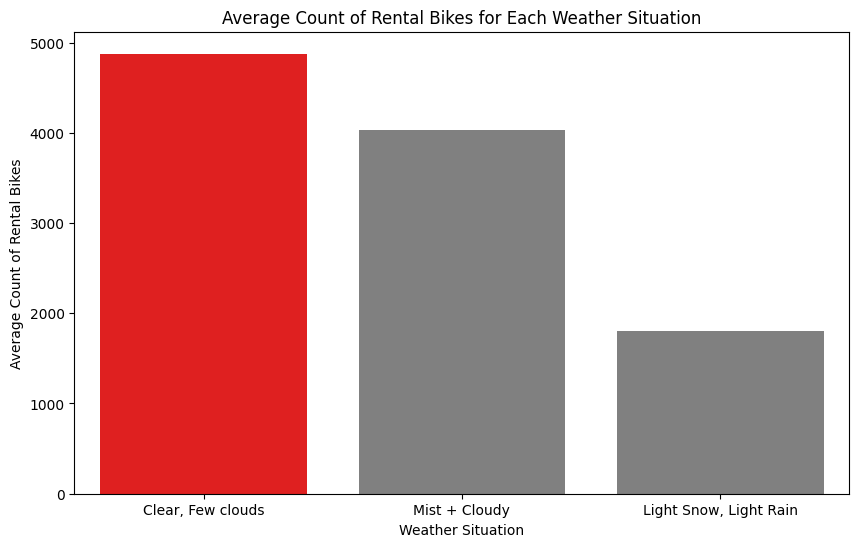

In [8]:
# Group by 'weathersit' and calculate the mean 'cnt' for each group
weather_cnt_means = df.groupby('weathersit')['cnt'].mean().reset_index()

# Map weathersit values to corresponding labels using the attribute information
weather_labels = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain + Thunderstorm + Mist, Snow + Fog'
}

# Add a new column with weather labels
weather_cnt_means['weathersit_label'] = weather_cnt_means['weathersit'].map(weather_labels)

# Define custom colors
custom_palette = {'Clear, Few clouds': 'red', 'Mist + Cloudy': 'grey', 'Light Snow, Light Rain': 'grey', 'Heavy Rain + Thunderstorm + Mist, Snow + Fog': 'grey'}

# Plot the bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_label', y='cnt', data=weather_cnt_means, palette=custom_palette)
plt.title('Average Count of Rental Bikes for Each Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Count of Rental Bikes')
plt.show()

### Pertanyaan 2:

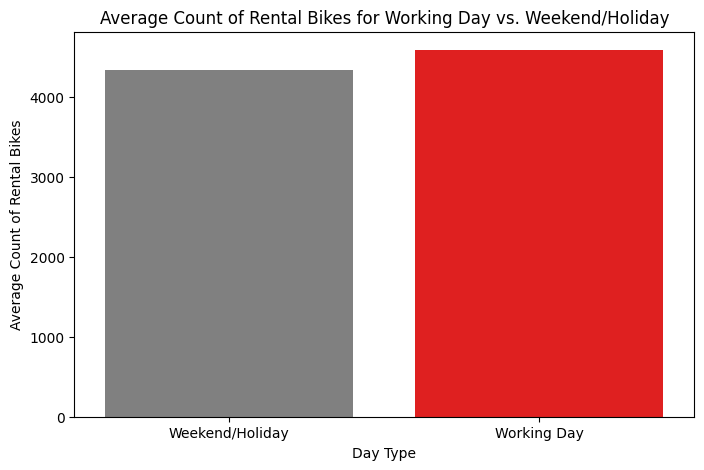

In [9]:
# Group by 'workingday' and calculate the mean 'cnt' for each group
workingday_cnt_means = df.groupby('workingday')['cnt'].mean().reset_index()

# Map workingday values to corresponding labels using the attribute information
workingday_labels = {0: 'Weekend/Holiday', 1: 'Working Day'}

# Add a new column with workingday labels
workingday_cnt_means['workingday_label'] = workingday_cnt_means['workingday'].map(workingday_labels)

# Define custom colors
custom_palette = {'Working Day': 'red', 'Weekend/Holiday': 'grey'}

# Plot the bar plot with custom colors
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday_label', y='cnt', data=workingday_cnt_means, palette=custom_palette)
plt.title('Average Count of Rental Bikes for Working Day vs. Weekend/Holiday')
plt.xlabel('Day Type')
plt.ylabel('Average Count of Rental Bikes')
plt.show()

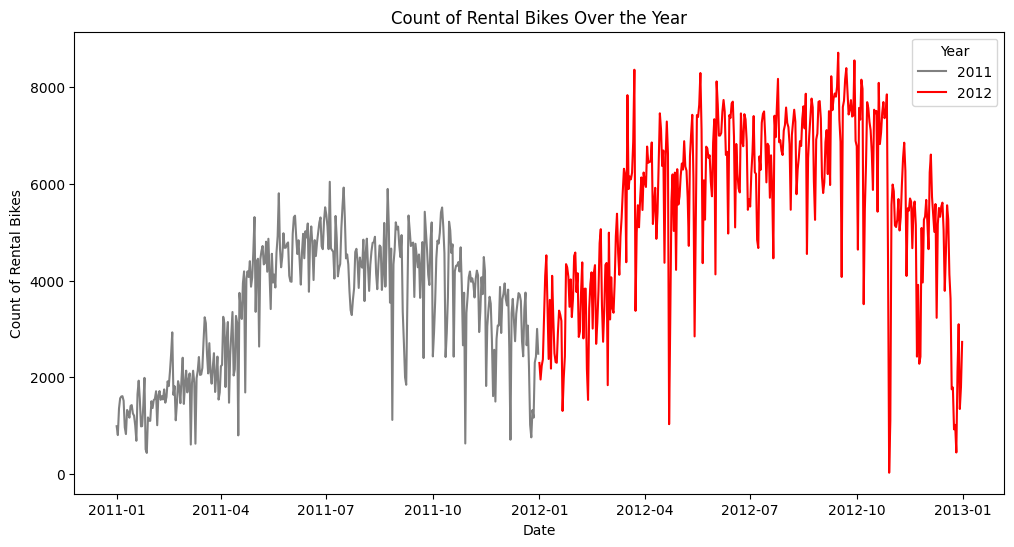

In [10]:
# Convert 'dteday' to datetime type if it's not already
df['dteday'] = pd.to_datetime(df['dteday'])

# Group by 'yr' and 'dteday' and calculate the sum 'cnt' for each group
yearly_cnt_sum = df.groupby(['yr', 'dteday'])['cnt'].sum().reset_index()

# Map yr values to corresponding labels using the attribute information
year_labels = {0: 2011, 1: 2012}

# Add a new column with year labels
yearly_cnt_sum['year_label'] = yearly_cnt_sum['yr'].map(year_labels)

# Define custom colors
custom_palette = {2011: 'grey', 2012: 'red'}

# Plot the line chart with custom colors
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', hue='year_label', data=yearly_cnt_sum, palette=custom_palette)
plt.title('Count of Rental Bikes Over the Year')
plt.xlabel('Date')
plt.ylabel('Count of Rental Bikes')
plt.legend(title='Year')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dapat dilihat bahwa penyewaan sepeda paling banyak pada kondisi cuaca cerah. Sedangkan tidak ada yang menyewa sepeda pada cuaca buruk seperti saat badai atau hujan deras. Menariknya masih ada yang menyewa sepeda walaupun sedang hujan dan bersalju.
- Conclution pertanyaan 2: Pada grafik bar dapat disimpulkan bahwa lebih banyak yang menyewa sepeda saat hari kerja dibandingkan hari libur. Bisa disimpulkan bahwa penyewaan sepeda ini ditargetkan untuk pekerja atau siswa yang aktif pada hari kerja, bukan untuk liburan.
- Conclition pertanyaan 3: Perkembangan penyewaan sepeda dari tahun 2011 ke tahun 2012 adalah terjadi peningkatan yang signifikan pada tahun 2012. Dan menariknya pada akhir dan awal tahun terjadi penurunan yang cukup signifikan. Hal ini selaras dengan yang telah disimpulkan pada poin pertama dan ke 2 bahwa lebih banyak yang menyewa sepeda pada hari kerja, dikarenakan awal dan akhir tahun merupakan musim liburan dan cuacanya kurang bagus karena musim salju.